In [392]:
# %pip install seaborn

In [393]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [394]:
df = pd.read_csv('pokemon_data_pokeapi.csv')
df.head()

,Name,Pokedex Number,Type1,Type2,Classification,Height (m),Weight (kg),Abilities,Generation,Legendary Status
0,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,"Overgrow, Chlorophyll",1,No
1,Ivysaur,2,Grass,Poison,Seed Pokémon,1.0,13.0,"Overgrow, Chlorophyll",1,No
2,Venusaur,3,Grass,Poison,Seed Pokémon,2.0,100.0,"Overgrow, Chlorophyll",1,No
3,Charmander,4,Fire,NaN,Lizard Pokémon,0.6,8.5,"Blaze, Solar-power",1,No
4,Charmeleon,5,Fire,NaN,Flame Pokémon,1.1,19.0,"Blaze, Solar-power",1,No


In [395]:
df['Legendary Status'] = df['Legendary Status'].apply(lambda st: 1 if st == 'Yes' else 0)
df['Legendary Status'].unique()

array([0, 1])

In [396]:
df.head()

,Name,Pokedex Number,Type1,Type2,Classification,Height (m),Weight (kg),Abilities,Generation,Legendary Status
0,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,"Overgrow, Chlorophyll",1,0
1,Ivysaur,2,Grass,Poison,Seed Pokémon,1.0,13.0,"Overgrow, Chlorophyll",1,0
2,Venusaur,3,Grass,Poison,Seed Pokémon,2.0,100.0,"Overgrow, Chlorophyll",1,0
3,Charmander,4,Fire,NaN,Lizard Pokémon,0.6,8.5,"Blaze, Solar-power",1,0
4,Charmeleon,5,Fire,NaN,Flame Pokémon,1.1,19.0,"Blaze, Solar-power",1,0


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              905 non-null    object 
 1   Pokedex Number    905 non-null    int64  
 2   Type1             905 non-null    object 
 3   Type2             449 non-null    object 
 4   Classification    905 non-null    object 
 5   Height (m)        905 non-null    float64
 6   Weight (kg)       905 non-null    float64
 7   Abilities         905 non-null    object 
 8   Generation        905 non-null    int64  
 9   Legendary Status  905 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 70.8+ KB


In [398]:
df['Type2'].fillna('No_Type', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              905 non-null    object 
 1   Pokedex Number    905 non-null    int64  
 2   Type1             905 non-null    object 
 3   Type2             905 non-null    object 
 4   Classification    905 non-null    object 
 5   Height (m)        905 non-null    float64
 6   Weight (kg)       905 non-null    float64
 7   Abilities         905 non-null    object 
 8   Generation        905 non-null    int64  
 9   Legendary Status  905 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 70.8+ KB


C:\Users\felip\AppData\Local\Temp\ipykernel_16412\2186597432.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type2'].fillna('No_Type', inplace=True)


In [399]:
df['Abilities']

0                       Overgrow, Chlorophyll
1                       Overgrow, Chlorophyll
2                       Overgrow, Chlorophyll
3                          Blaze, Solar-power
4                          Blaze, Solar-power
                        ...                  
900                Guts, Bulletproof, Unnerve
901    Swift-swim, Adaptability, Mold-breaker
902          Pressure, Unburden, Poison-touch
903      Poison-point, Swift-swim, Intimidate
904                      Cute-charm, Contrary
Name: Abilities, Length: 905, dtype: object

C:\Users\felip\AppData\Local\Temp\ipykernel_16412\2410857597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=type1_counts.index, y=type1_counts.values, palette='viridis')


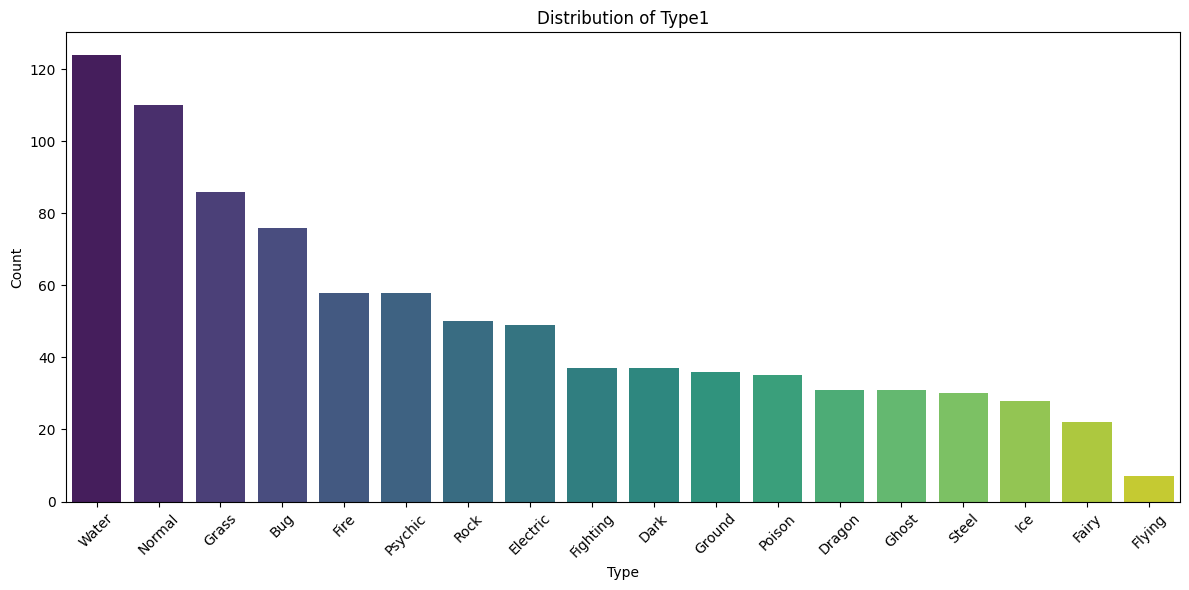

In [400]:
plt.figure(figsize=(12, 6))
type1_counts = df['Type1'].value_counts()
sn.barplot(x=type1_counts.index, y=type1_counts.values, palette='viridis')
plt.title('Distribution of Type1')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_16412\1961667034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=type2_counts.index, y=type2_counts.values, palette='viridis')


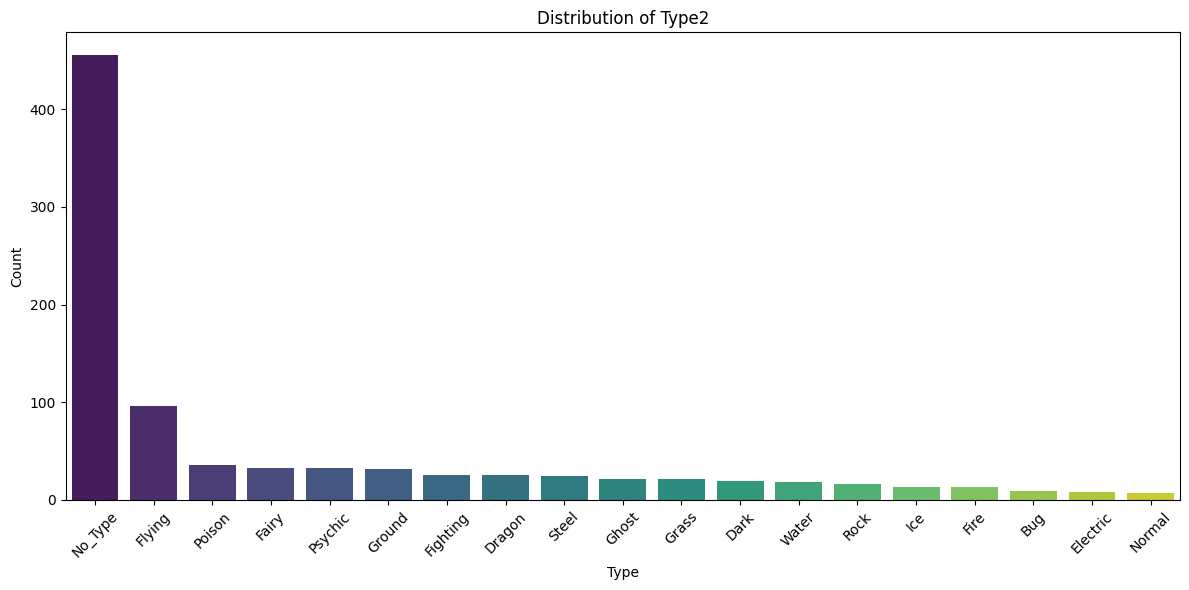

In [401]:
plt.figure(figsize=(12, 6))
type2_counts = df['Type2'].value_counts()
sn.barplot(x=type2_counts.index, y=type2_counts.values, palette='viridis')
plt.title('Distribution of Type2')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [402]:
df[df['Type2'] == 'No_Type']['Type2'].count()

np.int64(456)

In [403]:
mixed_types = pd.DataFrame({'Name': df['Name'], 'Types': df['Type1'] + '&' + df['Type2']})
mixed_types = mixed_types[~mixed_types['Types'].str.contains("&No_Type", na=False)]
mixed_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, 0 to 904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    449 non-null    object
 1   Types   449 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [404]:
len(mixed_types['Types'].unique())

160

C:\Users\felip\AppData\Local\Temp\ipykernel_16412\1282356961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=analysis.index, y=analysis.values, palette='viridis')


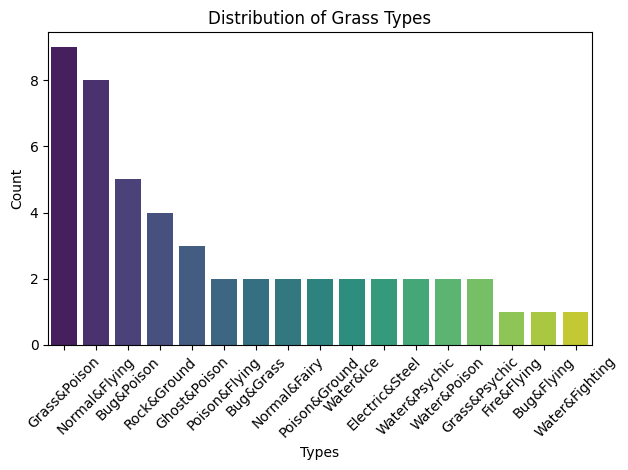

In [405]:
analysis = pd.Series(mixed_types['Types'][0:50]).value_counts()
sn.barplot(x=analysis.index, y=analysis.values, palette='viridis')
plt.title('Distribution of Grass Types')
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [407]:
def splitWithoutNoType(type1) -> pd.DataFrame:
    onlyFirstType = df[df['Type1'] == type1]
    onlyFirstType = onlyFirstType[~onlyFirstType['Type2'].str.contains("No_Type", na=False)]
    onlyFirstType['Types'] = df['Type1'] + '&' + df['Type2']
    return onlyFirstType

In [408]:
grass = splitWithoutNoType('Grass')
grass.head()

,Name,Pokedex Number,Type1,Type2,Classification,Height (m),Weight (kg),Abilities,Generation,Legendary Status,Types
0,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,"Overgrow, Chlorophyll",1,0,Grass&Poison
1,Ivysaur,2,Grass,Poison,Seed Pokémon,1.0,13.0,"Overgrow, Chlorophyll",1,0,Grass&Poison
2,Venusaur,3,Grass,Poison,Seed Pokémon,2.0,100.0,"Overgrow, Chlorophyll",1,0,Grass&Poison
42,Oddish,43,Grass,Poison,Weed Pokémon,0.5,5.4,"Chlorophyll, Run-away",1,0,Grass&Poison
43,Gloom,44,Grass,Poison,Weed Pokémon,0.8,8.6,"Chlorophyll, Stench",1,0,Grass&Poison


In [409]:
fire = splitWithoutNoType('Fire')
fire.head()

,Name,Pokedex Number,Type1,Type2,Classification,Height (m),Weight (kg),Abilities,Generation,Legendary Status,Types
5,Charizard,6,Fire,Flying,Flame Pokémon,1.7,90.5,"Blaze, Solar-power",1,0,Fire&Flying
145,Moltres,146,Fire,Flying,Flame Pokémon,2.0,60.0,"Pressure, Flame-body",1,1,Fire&Flying
218,Magcargo,219,Fire,Rock,Lava Pokémon,0.8,55.0,"Magma-armor, Flame-body, Weak-armor",2,0,Fire&Rock
249,Ho-oh,250,Fire,Flying,Rainbow Pokémon,3.8,199.0,"Pressure, Regenerator",2,1,Fire&Flying
255,Combusken,256,Fire,Fighting,Young Fowl Pokémon,0.9,19.5,"Blaze, Speed-boost",3,0,Fire&Fighting


In [410]:
water = splitWithoutNoType('Water')
water.head()

,Name,Pokedex Number,Type1,Type2,Classification,Height (m),Weight (kg),Abilities,Generation,Legendary Status,Types
61,Poliwrath,62,Water,Fighting,Tadpole Pokémon,1.3,54.0,"Water-absorb, Damp, Swift-swim",1,0,Water&Fighting
71,Tentacool,72,Water,Poison,Jellyfish Pokémon,0.9,45.5,"Clear-body, Liquid-ooze, Rain-dish",1,0,Water&Poison
72,Tentacruel,73,Water,Poison,Jellyfish Pokémon,1.6,55.0,"Clear-body, Liquid-ooze, Rain-dish",1,0,Water&Poison
78,Slowpoke,79,Water,Psychic,Dopey Pokémon,1.2,36.0,"Oblivious, Own-tempo, Regenerator",1,0,Water&Psychic
79,Slowbro,80,Water,Psychic,Hermit Crab Pokémon,1.6,78.5,"Oblivious, Own-tempo, Regenerator",1,0,Water&Psychic


In [411]:
print(f'Grass: {grass['Name'].count()}')
print(f'Fire: {fire['Name'].count()}')
print(f'Water: {water['Name'].count()}')

Grass: 43
Fire: 25
Water: 57


C:\Users\felip\AppData\Local\Temp\ipykernel_16412\2252883066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=grass_counts.index, y=grass_counts.values, palette='viridis')


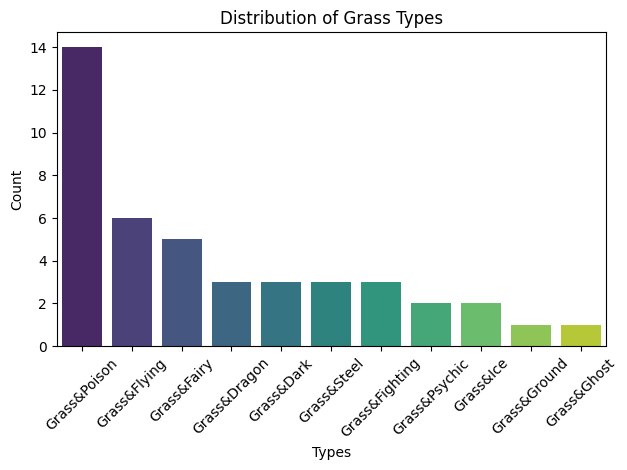

In [412]:
grass_counts = pd.Series(grass['Types']).value_counts()
sn.barplot(x=grass_counts.index, y=grass_counts.values, palette='viridis')
plt.title('Distribution of Grass Types')
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_16412\1400934593.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=fire_counts.index, y=fire_counts.values, palette='viridis')


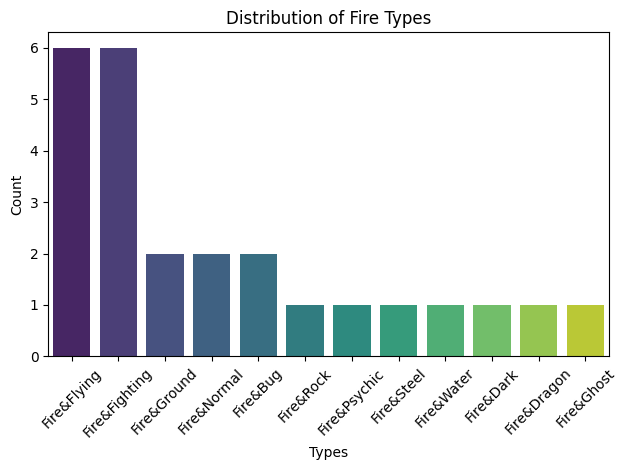

In [413]:
fire_counts = pd.Series(fire['Types']).value_counts()
sn.barplot(x=fire_counts.index, y=fire_counts.values, palette='viridis')
plt.title('Distribution of Fire Types')
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_16412\1608847119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=water_counts.index, y=water_counts.values, palette='viridis')


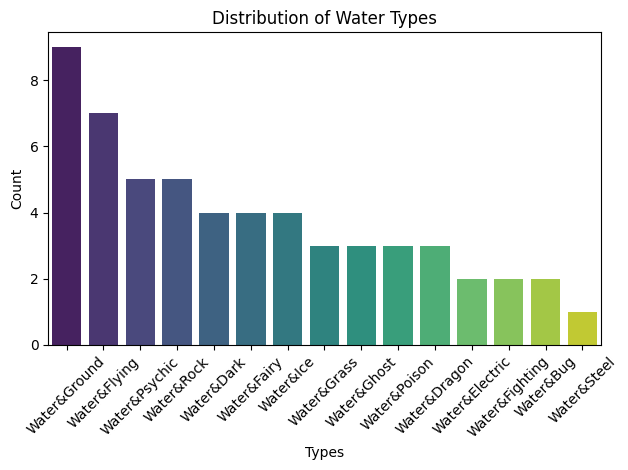

In [414]:
water_counts = pd.Series(water['Types']).value_counts()
sn.barplot(x=water_counts.index, y=water_counts.values, palette='viridis')
plt.title('Distribution of Water Types')
plt.xlabel('Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Height (m)', ylabel='Count'>

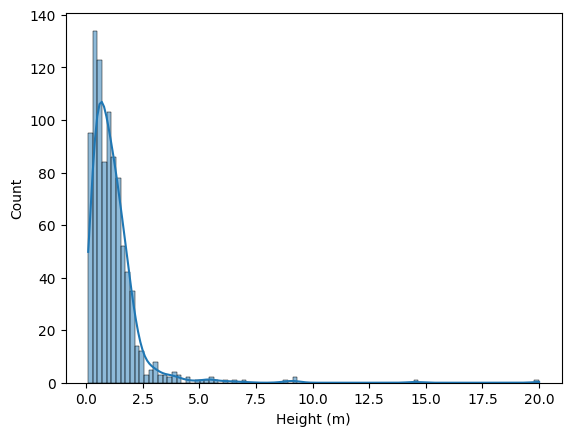

In [450]:
sn.histplot(data=df['Height (m)'], kde=True, legend=False)

<Axes: xlabel='Weight (kg)', ylabel='Count'>

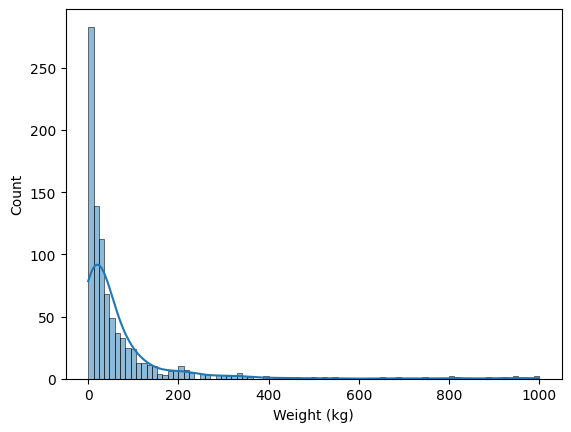

In [451]:
sn.histplot(data=df['Weight (kg)'], kde=True, legend=False)

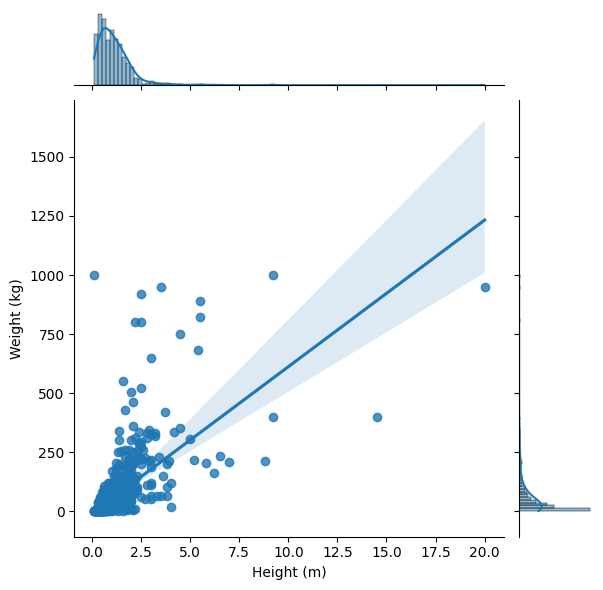

In [453]:
sn.jointplot(data=df, x='Height (m)', y='Weight (kg)', dropna=True, kind='reg')